<a href="https://colab.research.google.com/github/Gus-1003/GeoProcessamento_Estudos_Dados/blob/main/Sidra_RN_Produ%C3%A7%C3%B5esTemporarias/Sidra_RN_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Produção de Culturas temporarias no Rio Grande do Norte - UFRN

- análise de uma culturas agrícolas (dados de 2020)

## Instalando Pacotes


In [1]:
!pip install geopandas shapely mapclassify libpysal splot esda pysal
!pip install --upgrade pyshp
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import shapefile

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal.weights import Queen
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Leitura de arquivos:

### Conexão com o Drive:

In [29]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


### geodf = Mapa.json

In [88]:
# ler dados de interesse
geodf = gp.read_file("/content/drive/MyDrive/sidra/RN-2021/RN_Municipios_2021.shp") # ler shapefile
type(geodf)

geopandas.geodataframe.GeoDataFrame

In [89]:
geodf

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,2400109,Acari,RN,608.466,"POLYGON ((-36.62836 -6.27113, -36.62828 -6.271..."
1,2400208,Açu,RN,1303.442,"POLYGON ((-36.87317 -5.48598, -36.87427 -5.486..."
2,2400307,Afonso Bezerra,RN,576.179,"POLYGON ((-36.43987 -5.36988, -36.45524 -5.486..."
3,2400406,Água Nova,RN,50.684,"POLYGON ((-38.30905 -6.17740, -38.28854 -6.187..."
4,2400505,Alexandria,RN,381.205,"POLYGON ((-37.90082 -6.31832, -37.88895 -6.322..."
...,...,...,...,...,...
162,2414704,Várzea,RN,72.684,"POLYGON ((-35.36308 -6.28878, -35.36360 -6.289..."
163,2414753,Venha-Ver,RN,71.621,"POLYGON ((-38.46611 -6.33128, -38.46990 -6.333..."
164,2414803,Vera Cruz,RN,84.127,"POLYGON ((-35.37111 -6.04605, -35.37102 -6.046..."
165,2414902,Viçosa,RN,37.905,"POLYGON ((-37.92119 -5.95980, -37.93401 -6.002..."


In [90]:
geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    167 non-null    object  
 1   NM_MUN    167 non-null    object  
 2   SIGLA     167 non-null    object  
 3   AREA_KM2  167 non-null    float64 
 4   geometry  167 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 6.6+ KB


### dados = dataframe.csv

In [91]:
# ler dados de interesse
dados = pd.read_csv('https://raw.githubusercontent.com/Gus-1003/GeoProcessamento_Estudos_Dados/main/Sidra_RN_Produ%C3%A7%C3%B5esTemporarias/Base_Principal%20(1).csv', delimiter=";", quotechar='"')
dados

,Cód.,Município,Batata-doce (Kg/ha),Cana-de-açúcar(Kg/ha),Feijão (em grão)(Kg/ha),Mandioca(Kg/ha),Melancia(Kg/ha),Milho (em grão)(Kg/ha)
0,2400109,Acari (RN),-,-,257,-,16000,500
1,2400208,Açu (RN),12333,51000,450,10500,27324,400
2,2400307,Afonso Bezerra (RN),-,-,421,9333,27480,500
3,2400406,Água Nova (RN),-,-,300,-,-,556
4,2400505,Alexandria (RN),-,50000,417,-,-,550
...,...,...,...,...,...,...,...,...
162,2414704,Várzea (RN),9500,-,600,8000,-,700
163,2414753,Venha-Ver (RN),-,45000,615,7200,-,737
164,2414803,Vera Cruz (RN),8900,-,600,12000,-,800
165,2414902,Viçosa (RN),9000,-,500,-,-,800


In [92]:
dados.head()

,Cód.,Município,Batata-doce (Kg/ha),Cana-de-açúcar(Kg/ha),Feijão (em grão)(Kg/ha),Mandioca(Kg/ha),Melancia(Kg/ha),Milho (em grão)(Kg/ha)
0,2400109,Acari (RN),-,-,257,-,16000,500
1,2400208,Açu (RN),12333,51000,450,10500,27324,400
2,2400307,Afonso Bezerra (RN),-,-,421,9333,27480,500
3,2400406,Água Nova (RN),-,-,300,-,-,556
4,2400505,Alexandria (RN),-,50000,417,-,-,550


In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cód.                     167 non-null    int64 
 1   Município                167 non-null    object
 2   Batata-doce (Kg/ha)      167 non-null    object
 3   Cana-de-açúcar(Kg/ha)    167 non-null    object
 4   Feijão (em grão)(Kg/ha)  167 non-null    object
 5   Mandioca(Kg/ha)          167 non-null    object
 6   Melancia(Kg/ha)          167 non-null    object
 7   Milho (em grão)(Kg/ha)   167 non-null    object
dtypes: int64(1), object(7)
memory usage: 10.6+ KB


## Merge (Dados and Mapa)

In [95]:
# mesclar shapefile com dataframe usando a coluna mun
geodf.rename(columns={'CD_MUN': 'mun'}, inplace=True)  # mudar nome da coluna com cód. para 'mun'
geodf['mun'] = geodf.mun.astype(int)  # transformar códigos em inteiros

In [96]:
geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mun       167 non-null    int64   
 1   NM_MUN    167 non-null    object  
 2   SIGLA     167 non-null    object  
 3   AREA_KM2  167 non-null    float64 
 4   geometry  167 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 6.6+ KB


In [97]:
dados.rename(columns={'Cód.': 'mun'}, inplace=True)  # mudar nome da coluna com cód. para 'mun'
dados['mun'].astype(int)

0      2400109
1      2400208
2      2400307
3      2400406
4      2400505
        ...   
162    2414704
163    2414753
164    2414803
165    2414902
166    2415008
Name: mun, Length: 167, dtype: int64

In [115]:
feijão = dados.iloc[:, [4]]
feijão

,Feijão (em grão)(Kg/ha)
0,257
1,450
2,421
3,300
4,417
...,...
162,600
163,615
164,600
165,500


In [118]:
mapa = pd.concat([geodf, feijão], axis=1, join="inner")

In [116]:
br = pd.merge(geodf, feijão, on='mun', suffixes=('', '_y'))  # mesclar o dataframe e o shapefile em um objeto
br = br.loc[:, br.columns != 'NM_MUNICIP']  # tirar a coluna NM_MUNICIP

KeyError: ignored

In [99]:
br.head(10)

,mun,NM_MUN,SIGLA,AREA_KM2,geometry,Município,Batata-doce (Kg/ha),Cana-de-açúcar(Kg/ha),Feijão (em grão)(Kg/ha),Mandioca(Kg/ha),Melancia(Kg/ha),Milho (em grão)(Kg/ha)
0,2400109,Acari,RN,608.466,"POLYGON ((-36.62836 -6.27113, -36.62828 -6.271...",Acari (RN),-,-,257,-,16000,500
1,2400208,Açu,RN,1303.442,"POLYGON ((-36.87317 -5.48598, -36.87427 -5.486...",Açu (RN),12333,51000,450,10500,27324,400
2,2400307,Afonso Bezerra,RN,576.179,"POLYGON ((-36.43987 -5.36988, -36.45524 -5.486...",Afonso Bezerra (RN),-,-,421,9333,27480,500
3,2400406,Água Nova,RN,50.684,"POLYGON ((-38.30905 -6.17740, -38.28854 -6.187...",Água Nova (RN),-,-,300,-,-,556
4,2400505,Alexandria,RN,381.205,"POLYGON ((-37.90082 -6.31832, -37.88895 -6.322...",Alexandria (RN),-,50000,417,-,-,550
5,2400604,Almino Afonso,RN,128.038,"POLYGON ((-37.76511 -6.07730, -37.76194 -6.084...",Almino Afonso (RN),10000,50000,556,-,-,667
6,2400703,Alto do Rodrigues,RN,191.334,"POLYGON ((-36.71031 -5.32150, -36.66436 -5.372...",Alto do Rodrigues (RN),-,-,500,-,25000,389
7,2400802,Angicos,RN,741.582,"POLYGON ((-36.57273 -5.58593, -36.49281 -5.595...",Angicos (RN),-,-,354,-,-,400
8,2400901,Antônio Martins,RN,244.897,"POLYGON ((-37.90738 -6.14497, -37.90738 -6.145...",Antônio Martins (RN),-,-,450,-,-,625
9,2401008,Apodi,RN,1602.477,"POLYGON ((-37.69110 -5.48236, -37.71163 -5.510...",Apodi (RN),9800,-,939,8560,28780,1545


In [47]:
br.columns

Index(['mun', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry', 'Município',
       'Batata-doce (Kg/ha)', 'Cana-de-açúcar(Kg/ha)',
       'Feijão (em grão)(Kg/ha)', 'Mandioca(Kg/ha)', 'Melancia(Kg/ha)',
       'Milho (em grão)(Kg/ha)'],
      dtype='object')

In [100]:
variavel = 'Feijão (em grão)(Kg/ha)'      # escolher a variável e colocar entre aspas

In [103]:
# resumo estatístico
br[variavel].describe()

count     167
unique     69
top       500
freq       24
Name: Feijão (em grão)(Kg/ha), dtype: object

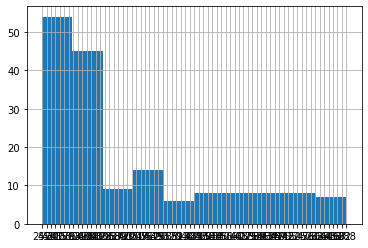

In [86]:
# histograma
br[variavel].hist();

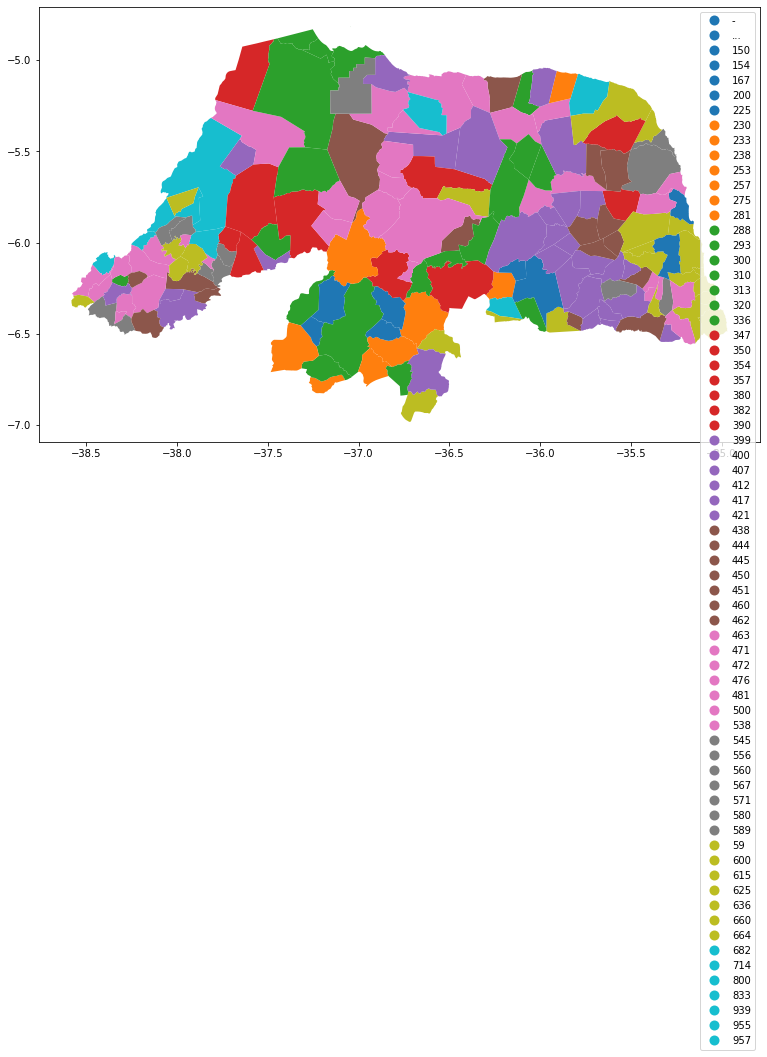

In [121]:
ax = mapa.plot(figsize=(16,8), column='Feijão (em grão)(Kg/ha)', legend = True)

In [60]:
# boxplot
sns.boxplot(br[variavel], orient='v');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


TypeError: ignored

In [61]:
# visualizar os municípios em ordem decrescente (ou crescente)
br.sort_values(variavel, ascending=False)[['nome_mun', 'nome_uf', 'nome_meso', variavel]].head(10)

KeyError: ignored

In [ ]:
# mapa temático - simples
br.plot(variavel, legend=True);

In [ ]:
# mapa temático - quantiles
br.plot(column=variavel, figsize=(10, 10), scheme='Quantiles', cmap='OrRd', legend=True, k=4);

In [ ]:
# mapa temático - equal_interval
br.plot(column=variavel, figsize=(10, 10), scheme='Equal_Interval', cmap='OrRd', legend=True, k=4);

In [ ]:
# intervalos de valores definidos pelo usuário
referencia = [10000, 500000, 1000000, 4000000]     # valores de referência considera 'abaixo que'
labels = ['a: 0 - 10 mil', 'b: 10 mil - 500 mil', 'c: 500 mil - 1 milhão', 'd: 1 milhão - 4 milhões']  # letras por causa de ordenação alfabética
valores = br[variavel]
quantis = mc.UserDefined(valores, referencia)
cl = [labels[i] for i in quantis.yb]
df = br.assign(cl=cl)
df.cl = pd.Categorical(df.cl, ordered=True, categories=labels)
df.plot(column='cl', figsize=(10, 10), cmap='OrRd', legend=True);

In [ ]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(br)
w.transform = 'r'
# calcular I de Moran global para a variável escolhida
y = br[variavel].values
moran = Moran(y, w)
moran.I

In [ ]:
br.shape

In [ ]:
# ilhas
br.query('index == 1523 or index == 3493')

In [ ]:
# retirar ilhas
br = br.drop([1523, 3493]) # retira F. Noronha e Ilhabela

O sistema de referência WGS84 (*World Geodetic System*, 1984) é bastante utilizado em sistemas GPS e aplicativos da Google, por exemplo). A Google utiliza informações espaciais que são armazenadas como WGS84 e projetadas para WGS84 (EPSG: 4326) para o Google Earth e Pseudo Mercator (EPSG: 3857) para o Google Maps.

Fonte: https://geopandas.org/en/stable/docs/user_guide/projections.html



In [ ]:
# ajustando o sistema de referência de coordenadas
br = br.to_crs(epsg=3395)
br.shape

In [ ]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(br)
w.transform = 'r'
# calcular I de Moran global para a variável escolhida
y = br[variavel].values
moran = Moran(y, w)
moran.I

In [ ]:
# valor-p   nível de significância: 0,05
moran.p_sim

In [ ]:
# só o diagrama de dispersão
moran_loc = Moran_Local(y, w)
moran_scatterplot(moran_loc, p=0.05);

In [ ]:
# mapa LISA
lisa_cluster(moran_loc, br, p=0.05, figsize = (9,9));

# Escolher partes do Brasil:

Unir estados para formar as regiões do Brasil.

In [ ]:
br.nome_uf.unique()

In [ ]:
SE = br.query('nome_uf == ["Minas Gerais", "São Paulo", "Rio de Janeiro", "Espírito Santo"]')

In [ ]:
SE.shape

In [ ]:
SE.plot();

In [ ]:
# mapa temático - quantiles
SE.plot(column=variavel, figsize=(10, 10), scheme='Quantiles', cmap='OrRd', legend=True, k=4);

In [ ]:
# resumo estatístico - para auxiliar na construção dos intervalos
SE[variavel].describe()

In [ ]:
# intervalos de valores definidos pelo usuário
referencia = [100, 7000, 3480000]     # valores de referência considera 'abaixo que'
labels = ['a: 0 - 100', 'b: 100 - 7 mil', 'c: 7 mil - 348 mil']  # letras por causa de ordenação alfabética
valores = SE[variavel]
quantis = mc.UserDefined(valores, referencia)
cl = [labels[i] for i in quantis.yb]
df = SE.assign(cl=cl)
df.cl = pd.Categorical(df.cl, ordered=True, categories=labels)
df.plot(column='cl', figsize=(10, 10), cmap='OrRd', legend=True);

# Tarefa 1:

Eu escolhi unir os estados da região Sudeste. Para a mesma variável utilizada por mim:

- escolha estados de outra região do Brasil
- obter o mapa temático por quantis
- obter o mapa temático definido pelo usuário, da forma que for mais adequada para a região escolhida por você (escolha quantos intervalos quiser e faça os ajustes necessários nos valores)

# Diferentes níveis de agregação:

Dividir em microrregiões do Brasil

In [ ]:
# usando a função buffer
br['geometry'] = br.geometry.buffer(0)

In [ ]:
# agrupar municípios em microrregiões
# somando os valores da variável para os municípios contidos em cada microrregião
micros = br.dissolve(by=['micro', 'nome_micro', 'nome_uf'], aggfunc='sum')
micros.head(3)

In [ ]:
micros.shape

In [ ]:
# reiniciar índices e retirar as colunas que não serão usadas
micros = micros.reset_index()
retirar = ['mun', 'uf', 'meso', 'cod_rgi', 'cod_rgint', 'codmun6', 'regiao', 'area']
micros = micros.drop(retirar, axis=1)
micros.head(3)

In [ ]:
micros = micros.to_crs(epsg=3395)

In [ ]:
# resumo estatístico
micros[variavel].describe()

In [ ]:
micros[variavel].hist();

In [ ]:
# boxplot
sns.boxplot(micros[variavel], orient='v');

In [ ]:
# visualizar as microrregiões em ordem decrescente (ou crescente)
micros.sort_values(variavel, ascending=False)[['nome_micro', 'nome_uf', variavel]].head(10)

In [ ]:
# mapa simples
micros.plot();

In [ ]:
# mapa temático - quantiles
micros.plot(column=variavel, figsize=(10, 10), scheme='Quantiles', cmap='OrRd', legend=True, k=4);

In [ ]:
# mapa temático - equal_interval
micros.plot(column=variavel, figsize=(10, 10), scheme='Equal_Interval', cmap='OrRd', legend=True, k=4);

In [ ]:
# mapa temático - fisher_jenks
micros.plot(column=variavel, figsize=(10, 10), scheme='fisher_jenks', cmap='OrRd', legend=True, k=4);

In [ ]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(micros)
w.transform = 'r'
# calcular I de Moran global para a variável escolhida
y = micros[variavel].values
moran = Moran(y, w)
moran.I

In [ ]:
# valor-p
moran.p_sim

In [ ]:
# mapa LISA
moran_loc = Moran_Local(y, w)
lisa_cluster(moran_loc, micros, p=0.05, figsize = (9,9));

In [ ]:
# mapa LISA com nomes dos significativos
fig, ax = plt.subplots(1, figsize=(20, 20))
lisa_cluster(moran_loc, micros, p=0.05, ax=ax, figsize = (9,9));
sig = moran_loc.p_sim < 0.05  
posicoes = np.where(sig)
escolhidos = micros.iloc[posicoes[0]]
for j in escolhidos.index:
    ax.text(escolhidos.geometry.centroid[j].coords[0][0], escolhidos.geometry.centroid[j].coords[0][1], 
         escolhidos.nome_micro[j],
         fontsize=10, horizontalalignment='center', verticalalignment='bottom')

# Tarefa 2

Eu utilizei o nível de agregação microrregiões para os dados do Brasil. Usando a mesma variável já utilizada, escolha outro nível de agregação (mesorregiões, regiões imediatas, regiões intermediárias ou mesmo estados) e faça a análise completa:

- obtenha o mapa temático que você achar mais adequado (quantis, intervalos iguais, fisher-jenks ou definido por você) e ANALISE (apontando como estão distribuídos os valores no território brasileiro)
- obtenha o valor do *I* de Moran e valor-*p* e ANALISE (o valor do *I* é significativo? O que isso quer dizer? Qual a interpretação prática para a variável em questão?) 
- obtenha o mapa LISA com os nomes das observações significativas e ANALISE (apontando quais foram os *clusters* espaciais, *outliers* espaciais)



# Tarefa 3

Compare suas conclusões obtidas na tarefa 2 (com o nível de agregação escolhido por você) com o que foi obtido por mim para as microrregiões:

- há semelhanças?
- há diferenças?
- aponte o que notou de interessante ao comparar os dois níveis de agragação (microrregiões *versus* nível escolhido por você)

Digite aqui sua análise da tarefa 3.


